<a href="https://colab.research.google.com/github/HenriqueCCdA/FormacaoAluraML/blob/main/Clustering/notebook/Cartao_credito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 2

In [1]:
import pandas as pd

In [2]:
path = 'https://raw.githubusercontent.com/HenriqueCCdA/FormacaoAluraML/main/Clustering/dados/CC_GENERAL.csv'

dataframe = pd.read_csv(path)

dataframe.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
dataframe.drop(columns=["CUST_ID", "TENURE"], inplace=True)
dataframe.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000


In [4]:
missing = dataframe.isna().sum()
print(missing)

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
dtype: int64


In [5]:
dataframe.fillna(dataframe.median(), inplace=True)
missing = dataframe.isna().sum()
print(missing)

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
dtype: int64


In [6]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dataframe.values)
print(values)

[[3.93555441e-02 7.87271593e-04 9.17958473e-02 ... 1.94178127e-01
  1.34239194e-01 0.00000000e+00]
 [2.93875903e-01 8.34231560e-05 0.00000000e+00 ... 3.76516684e-01
  9.84037959e-02 2.03923046e-05]
 [3.10798149e-01 1.24560965e-04 9.63068011e-02 ... 7.74852335e-02
  7.81351982e-02 0.00000000e+00]
 ...
 [2.27733092e-02 8.11060955e-04 1.40540698e-01 ... 7.90986945e-02
  8.02156174e-02 2.43318384e-04]
 [2.65257948e-02 1.64255731e-03 0.00000000e+00 ... 1.03579625e-01
  1.09898221e-01 4.92767391e-04]
 [1.86406219e-01 3.33426837e-04 5.46778061e-01 ... 3.15915455e-02
  4.41568390e-02 0.00000000e+00]]


In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

# Aula 5


In [8]:
from sklearn import metrics
labels = kmeans.labels_
silhouete = metrics.silhouette_score(values, labels, metric='euclidean')
print('silhouette:', silhouete)

silhouette: 0.364439277430815


In [9]:
dbs = metrics.davies_bouldin_score(values, labels)
print('davies_bouldin:', dbs)

davies_bouldin: 1.075878703157104


In [10]:
calinski = metrics.calinski_harabasz_score(values, labels)
print('calinski_harabasz:', calinski)

calinski_harabasz: 3431.782548172111


# Aula 6

In [11]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=100)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)

    return s, dbs, calinski

In [12]:
for n in [2, 3, 5, 10, 20, 50, 100]:
    s, dbs, calinski = clustering_algorithm(n, values)
    print(f'{n:3} {s:.2f} {dbs:.2f} {calinski:.2f}')

  2 0.30 1.52 3321.85
  3 0.33 1.31 3526.44
  5 0.36 1.08 3431.80
 10 0.35 1.12 3018.97
 20 0.28 1.21 2416.30
 50 0.23 1.24 1608.53
100 0.23 1.25 1169.55


In [13]:
dataframe.count()

BALANCE                             8950
BALANCE_FREQUENCY                   8950
PURCHASES                           8950
ONEOFF_PURCHASES                    8950
INSTALLMENTS_PURCHASES              8950
CASH_ADVANCE                        8950
PURCHASES_FREQUENCY                 8950
ONEOFF_PURCHASES_FREQUENCY          8950
PURCHASES_INSTALLMENTS_FREQUENCY    8950
CASH_ADVANCE_FREQUENCY              8950
CASH_ADVANCE_TRX                    8950
PURCHASES_TRX                       8950
CREDIT_LIMIT                        8950
PAYMENTS                            8950
MINIMUM_PAYMENTS                    8950
PRC_FULL_PAYMENT                    8950
dtype: int64

In [14]:
import numpy as np
random_data = np.random.rand(8950, 16)
s, dbs, calinski = clustering_algorithm(n, values)
sa, dbsa, calinskia = clustering_algorithm(5, random_data)
print(f'Conjuto aleatorio     : {sa:.2f} {dbsa:.2f} {calinskia:.2f}')
print(f'Conjuto nao aleatorio : {s:.2f} {dbs:.2f} {calinski:.2f}')

Conjuto aleatorio     : 0.04 3.53 304.53
Conjuto nao aleatorio : 0.22 1.24 1167.45


In [15]:
set1, set2, set3 = np.array_split(values, 3)
print(clustering_algorithm(5, set1))
print(clustering_algorithm(5, set2))
print(clustering_algorithm(5, set3))

(0.3689709458416189, 1.0581656052369075, 1204.0560966145404)
(0.3533093838590228, 1.142502270067299, 1194.9475421190975)
(0.36713104970461446, 1.0991014125845049, 1167.5075975296127)


#Aula 7

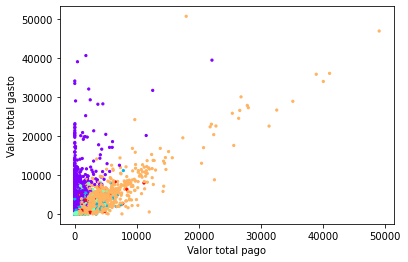

In [16]:
import matplotlib.pyplot as plt

plt.scatter(dataframe['PURCHASES'], dataframe['PAYMENTS'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Valor total pago")
plt.ylabel("Valor total gasto")
plt.show()

In [ ]:
import seaborn as sns

dataframe["cluster"] = labels

sns.pairplot(dataframe[0:], hue="cluster")

plt.show()

#Aula 8

In [18]:
dataframe.groupby('cluster').describe()

BALANCE                            ... PRC_FULL_PAYMENT               
          count         mean          std  ...              50%       75%  max
cluster                                    ...                                
0        1072.0  1794.024195  1982.950586  ...         0.083333  0.142857  1.0
1        2649.0  3037.962543  2478.838161  ...         0.000000  0.000000  0.6
2        3276.0   444.212219   846.809334  ...         0.000000  0.444444  1.0
3        1541.0  1140.395363  1663.836536  ...         0.083333  0.545455  1.0
4         412.0  1987.146873  1852.215743  ...         0.000000  0.000000  1.0

[5 rows x 128 columns]

In [19]:
centroids = kmeans.cluster_centers_
print(centroids)

[[2.35141479e-01 2.16555293e-04 6.03857074e-02 3.44170171e-02
  2.59739049e-02 4.00128071e-01 5.26401668e-05 2.04882397e-05
  3.51921361e-05 6.54864556e-05 1.57199032e-03 1.12217156e-03
  5.35089146e-01 5.98040052e-01 1.04348171e-01 2.77498236e-05]
 [5.04289599e-01 2.72275541e-04 6.17031152e-02 3.61472866e-02
  2.55775500e-02 2.52998524e-01 6.73317111e-05 2.56982515e-05
  4.50750034e-05 5.74605324e-05 1.15731022e-03 1.33218565e-03
  7.19155598e-01 1.66164956e-01 1.79275871e-01 5.52512128e-07]
 [6.91172082e-02 2.30558192e-04 1.21221061e-01 4.79941328e-02
  7.33273099e-02 2.43612925e-02 1.72569863e-04 3.36877097e-05
  1.40000012e-04 7.93012041e-06 1.24086835e-04 2.85723913e-03
  9.43757893e-01 1.53487867e-01 5.68276323e-02 7.58208708e-05]
 [1.59738813e-01 2.45539530e-04 4.37899142e-01 2.56417561e-01
  1.81652647e-01 2.57868915e-02 2.04724593e-04 8.88180408e-05
  1.51100049e-04 9.36834144e-06 1.69378578e-04 6.17391999e-03
  6.04768068e-01 4.02440755e-01 8.52026617e-02 7.26174325e-05]
 [3.

In [31]:
max = len(centroids[0])

for i in range(max):
  print(f'{dataframe.columns.values[i]:35}  {centroids[:, i].var():.6f}')


BALANCE                              0.022422
BALANCE_FREQUENCY                    0.000000
PURCHASES                            0.019599
ONEOFF_PURCHASES                     0.007608
INSTALLMENTS_PURCHASES               0.003588
CASH_ADVANCE                         0.022557
PURCHASES_FREQUENCY                  0.000000
ONEOFF_PURCHASES_FREQUENCY           0.000000
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000
CASH_ADVANCE_FREQUENCY               0.000000
CASH_ADVANCE_TRX                     0.000000
PURCHASES_TRX                        0.000003
CREDIT_LIMIT                         0.036010
PAYMENTS                             0.027983
MINIMUM_PAYMENTS                     0.054206
PRC_FULL_PAYMENT                     0.000000


In [48]:
description = dataframe.groupby("cluster")[["BALANCE", "PURCHASES", "CASH_ADVANCE", "CREDIT_LIMIT", "PAYMENTS"]]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,n_clients
cluster,,,,,,
0,1794.024195,475.494823,3270.246792,3976.372399,4709.556601,1072
1,3037.962543,385.248630,1636.917210,4495.771989,968.890376,2649
2,444.212219,629.173858,141.655729,5134.705973,814.396458,3276
3,1140.395363,3266.466710,182.900631,4096.794388,3034.900772,1541
4,1987.146873,858.326286,420.107194,2226.699029,1338.974045,412


cluster
0    1072
1    2649
2    3276
3    1541
4     412
dtype: int64

# Aula 9

CLUSTER 0: Pagam as vezes

CLUSTER 1: Clientes com os maiores calores em gastos. Menor valores em compras. Piores pagadores


CLUSTER 2: Clientes com os menos valores em gastos.

CLUSTER 3: Maior valor em compras com grande diferença

CLUSTER 4: Piores pagadores

In [53]:
dataframe.groupby("cluster")["PRC_FULL_PAYMENT"].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,1072.0,0.117384,0.186853,0.0,0.0,0.083333,0.142857,1.0
1,2649.0,0.001799,0.023260,0.0,0.0,0.000000,0.000000,0.6
2,3276.0,0.246293,0.346454,0.0,0.0,0.000000,0.444444,1.0
3,1541.0,0.279266,0.367477,0.0,0.0,0.083333,0.545455,1.0
4,412.0,0.019271,0.090795,0.0,0.0,0.000000,0.000000,1.0
